## Project Programming for Data Analytics 2018  Dataset Simulation


### notebook structure

The notebook is split up into the following sections which are based on the project problem statement requirements.

* Section One - General setup and importatation of necessary python libraries/packages
* Section Two - Details of chosen phenomenon and research
* Section Three - the types of variables involved, their likely distributions, and their relationships with each other.
* Section Four - Synthesise/simulate a data set as closely matching their properties as possible.
* Section Five - references and conclusion.

### Section one - getting started: importing packages
The following Python packages are imported for use in this notebook:
* Mathplotlib.pyplot.py [Mathplotlib.org](https://matplotlib.org). Matplotlib is a Python plotting library and Pyplot is a matplotlib module which provides a MATLAB type interface.
* NumPy [NumPy](http://www.numpy.org/). NumPy is a Python package for mathemical computing.
* Seaborn [Seaborn](https://seaborn.pydata.org). Seaborn is a Python package used for plotting data.
* Pandas [Pandas](https://pandas.pydata.org). Pandas is a Python package for use with data frames.

In [1]:
#command below ensures plots display correctly in the notebook
%matplotlib inline
#below imports all necessary python packages for this notebook
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

### Section Two - Details of chosen phenomenon & research

For this project I decided to build a dataset that would contain some synthesised student information, the information is based on some of the data gathered from Third Level Institutes by the Higher Education Authority and some of the  statistics that they produce based on this data. For more information about the Higher Education Authority see their website [HEA](http://hea.ie/)$^{1}$.

Following my initial research, the dataset that I decided to build was one based on the **Undergraduate New Entrant (UG NE) Enrollments who applied via CAO based on their leaving cert points**, concentrating on the **Institute of Technology** sector and for the term of entry **2016/2017**. 

I based most of my variables on information published by the HEA for the entry term 2016/17, [HEA Key Facts & figures 2016-17](http://hea.ie/assets/uploads/2018/02/HEA-Key-Facts-And-Figures-2016-17-FINAL.pdf)$^{2}$. and for determining at risk cohort I used [HEA PROGRESSION 2014-2015](http://hea.ie/assets/uploads/2018/09/HEA-Progression-Higher-Ed-201415-201516.pdf)$^{3}$. See note $^{*}$ below. 

For IOT sector information I used the suite of statistics in the [Statistics Archive section](http://hea.ie/statistics-archive/)$^{4}$ of the HEA website, selecting 2016 and New Entrant or enrollments where stats did not exist for new entrants. I then looked at the relevant figures for Galway Mayo IT. 

For CAO points data I looked at the CAO published points [CAO Statistics](http://www.cao.ie/index.php?page=points&bb=mediastats)$^{5}$ for Galway Mayo IT. This proved the most difficult vaiable to synthesise as CAO only publish final points (min) and Median Points and from them I had no way of determining max points or spread. HEA enrollment figures include other CAO applicants without CAO points (FETAC & MATURE for example) so I had no means of determining the CAO Leaving Certificate intake cohort. For the purpose of this project I decided to assume a uniform distribution of students across programmes and made **max points= median+(median-final)**. I also assumed **uniform intake** and did averages of programme points.$^{***}$.

My initial approach in the project was to see whether I could create the variables based on headline stats published for the sector. One I established that I could and had chosen my variables I created a dataset.

I then decided to use the progression publication's identification of a student most at risk to show how this dataset might be used in real life - to use risk analysis of known performance to identify in advance students most at risk of failure to progress. This could be of assistance for retention initiatives. As there are many variables that can influnce progression I selected the published 'at risk profile', below.

![at risk profile](https://raw.githubusercontent.com/Hudsonsue/progproj/master/img/at_risk_profile.PNG)
 
Once I had decided to do this I then refined my dataset to include appropriate disciplines, levels, gender breakdowns and changed all my variables from the sector level to the IOT sector level and to GMIT level where possible. 

I discarded one variable from my original dataset, mode of study (as the cohort of interest were all full time). I also considered discarding preference as it was not a variable of interest for HEA publicatons but decided to leave it in as it is a variable that might be considered in real world use within an institute.

In the next section I will outline each of the variables I synthesised and any problems I encountered when synthesising. 

**NOTES**

**The progression data for 2016-17 has not yet been published and 2014-2015 is the most recently published report.*

***where published statistics were not available for my cohort of interest I have used the next level up (e.g of IOT level stats not available for UG NE I have used total sector UG NE stats, where UG NE for sector not available I have used the IOT sector total UG Enrollment statistics.*

****I was able to check that my generated points were close enough to the actual points via information available to me in my workplace and was happy to proceed with my generated points on that basis*


### Section Three - the types of variables involved, their likely distributions, and their relationships with each other.

**Term code** - this is a categorical varible and in this instance has only one value which is term of interest. I included it as in real life data might include more than one term and the term could be used as the variable to allow trend analysis. 

**CAO_ID** - this is a unique reference number and I created data of type integar. To ensure it would still work if I scaled up the dataset I found out how to ensure only unique integars appended to the dataset. $^{6}$ 

**level** - I created a categorical variable of type object to denote student level. At the sectoral level there were levels other than 6, 7, 8 in the cohort of interest but these were negligible at GMIT level. For the purpose of this dataset the student/programme level is based on total full time Enrollments for GMIT L6/7/8 as % of total enrollments for GMIT. I did look at discipline/gender breakdowns but decided to use totals as I had no UG New Entrant figures and did not want to assume that the total would mirror the UG NE cohort as I might inadvertently dilute the cohort that I was demonstrating as being at risk!I considered trying to work back from published progression stats but as they contain FETAC and MATURE entrants I might be misrepresenting the CAO points entrant cohort. 

**discipline** - I created a categorical variable of discipline for each row. This is based on total discipline breakdown for GMIT Undergraduate Enrollments (there was no statistic available on discipline by level for the new entrant cohort). The same concerns existed as with level above and this was the basis for my decision to use the overall undergraduate discipline breakdown.

**preference** - this variable is not looked at by HEA but is of interest at institute level. As this is simulated data and I had no statistics to build it on I decided to assume that the distribition would include all avalable preferences with less at the lower level of preference. I found a Mathematics law, Benford' Law s'$^{7}$  that appeared to satisfy the requirement, I adapted this as best fit to my requirement that I could generate.

**Gender** - this is a categorical variable and the gender breakdown in 2016/17 for UG new entrants was 51% Female
and 49% Male. However,  for GMIT the breakdown was 55% male and 45% female overall. 
And when drilling down to the discipline the breakdowns moved even further away from the top level statistics.
I therefore had to generate genders based on discipline for accurate representation of the GMIT stats.

**date of birth & Mature indicator** -Students who are 23 on 1st Jan of the term of entry are considered to be mature students and are reported on sepately in some instances by the HEA. I created a column of dates of birth and assigned a mature/not mature column at the same time. When researching how to create random dates I found assistance in a response to a stackoverflow question $^{8}$ . I used the age profile for new total new entrants for GMIT.

**cao points** - I generated CAO points as outlined in the section above and then defined ranges of points for each discipline. I used the discipline column to read in appropriate points based on the defined ranges for each row. I used 
a response to a stack overflow query as guidance. $^{9}$

**risk status** using the HEA profile of a student most at risk of non progression in Y1 I used conditions to identify these students within the cohort, created an additional dataframe column and denoted any deemed at risk based on the profile. I also created a separate 'at risk' datafame, displayed within the notebook and output to a text file. 

 ### Section Four - Synthesise/simulate a data set as closely matching their properties as possible.

Below is the code used to generate the variables outlined above, any check counts and histograms I used and also the final output.
The dataset itself is shuffled $^{10}$ to make it more authentic looking and 

In [2]:
## below I have created the term 2016/2017 for all 200 records
Term =[]
for i in range(200):
    Term.append("2016/2017")

In [3]:
#below I have created a unique reference number for each student record (row).
#this is based on the CAO ID which consists of two numbers to represent the applcation term (16 in this instance)
#and a six digit unique person reference. This is the initial unique identifier used by institutes. 

CAO_ID =[]
i=(1)
while i<300:
       # CAO_ID =[]
        C = np.random.randint(16000000, 16100000)
        if C not in CAO_ID:CAO_ID.append(C)
        i=i+1
        if len(CAO_ID)==200:break
##print(CAO_ID)

len(CAO_ID)

200

In [4]:
# below I am creating the student/program level for each row 

program_level = np.random.choice(['6', '7', '8'], 200, p=[0.03,0.41,0.56])
len(program_level)


# programme level is based on total full time Enrollments for GMIT L6/7/8 as % of total enrollments. 
# I looked at discipline/gender breakdowns but decided to use total as I had no UG New Entrant figures
# and could not assume that the total would mirror the UG NE cohort. I comsidered trying to work back from published
# progression stats but as they contain FETAC and MATURE entrants I might be misrepresent the CAO points entrant cohort. 
# my main concern is that I might inadvertently dilute the cohort that I was demonstrating as being at risk 
# if I excluded them from the starting cohort by applying 


200

In [5]:
# below I am assigning a discipline to each row 

discipline =  np.random.choice(['Engineering', 'ict', 'science', 'other'], 200, p=[0.22, 0.10, 0.12, 0.56])
len(discipline)
## discipline is based on total discipline breakdown for GMIT Undergraduate new entrants.
## note that other represents all other unnamed disciplines combined

200

200


Text(0,0.5,'Frequency')

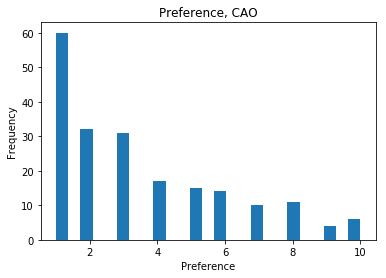

In [6]:
# below I will create a preference for each student row

pref =[]
for i in range (1,201):
    p = (int(11**np.random.random()))
    pref.append(p)
    ## assume preference follows Benfords law
len(pref)

# histogram below to show that my distribution is as expected
print(len(pref) )   
plt.hist(pref, 25)
plt.title("Preference, CAO")
plt.xlabel("Preference")
plt.ylabel("Frequency")

200


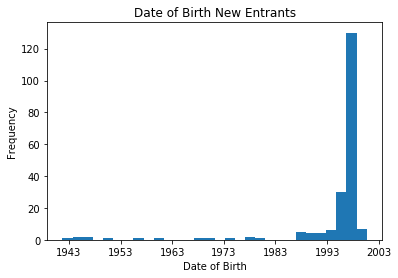

In [7]:
# below creates an array of random dates based on published student age profile for New Entrants SEP 2016
# Students born before 1st Jan 1993 would be classed as Mature, others as described as Not Mature by HEA
# Data Field MAT will be created alongside DOB

DOB =[]
MAT =[]
def random_date(start_date, range_in_days):
    days_to_add = np.arange(0, range_in_days)
    random_date = np.datetime64(start_date) + np.random.choice(days_to_add)
    return random_date
i=1
for i in range(7):
    dob17 = random_date('1999-01-01', 635)
    DOB.append(dob17)
    MAT.append("NOT_MATURE")
for i in range(62):
    dob18 = random_date('1998-01-01', 200)
    DOB.append(dob18)
    MAT.append("NOT_MATURE")
for i in range(68): 
    dob19 = random_date('1997-01-01', 200)
    DOB.append(dob19)
    MAT.append("NOT_MATURE")
for i in range(23):
    dob20 = random_date('1996-01-01', 200)
    DOB.append(dob20)
    MAT.append("NOT_MATURE")
for i in range(7):
    dob21 = random_date('1995-01-01', 200)
    DOB.append(dob21)
    MAT.append("NOT_MATURE")
for i in range(4):
    dob22 = random_date('1994-01-01', 200)
    DOB.append(dob22)
    MAT.append("NOT_MATURE")
for i in range(2):
    dob23 = random_date('1993-01-01', 200)
    DOB.append(dob23)
    MAT.append("MATURE")
for i in range(4):
    dob24 = random_date('1992-01-01', 200)
    DOB.append(dob24)
    MAT.append("MATURE")
for i in range(9):
    dob25_29 = random_date('1987-01-01', 1460)
    DOB.append(dob25_29)
    MAT.append("MATURE")
for i in range(14):
    dob30up = random_date('1941-01-01', 16425)
    DOB.append(dob30up)
    MAT.append ("MATURE")
    
# histogram below to show that my distribution is as expected
print(len(DOB) )   
plt.hist(DOB, 30)
plt.title("Date of Birth New Entrants")
plt.xlabel("Date of Birth")
plt.ylabel("Frequency")

plt.show()


In [8]:
## initial construct of dataframe 
df = pd.DataFrame ()
df ["Term"]=Term
df ["CAO_ID"] = CAO_ID
df ["level"]=program_level
df ["discipline"]=discipline
df ["pref"] = pref
##df ["Gender"] = M_F
df ["Date of Birth"]=DOB
df ["Mature student"]= MAT

In [9]:
## below I am creating CAO points for rows based on the disciplines 

def cao(row):
    if row["discipline"]=="Engineering":
        return(np.random.randint(35,109)*5)
    if row["discipline"]=="ict":
        return(np.random.randint(50,94)*5)
    if row["discipline"]=="science":
        return(np.random.randint(56,108)*5)
    else: 
        return (np.random.randint(28,101)*5)
c =df.apply (lambda row: cao (row),axis=1)

##print(c)
df["cao"]=c

In [10]:
# below I am selecting gender based on the published stats for GMIT entrants by field of study
# for fields of study not split out I am returning the combined breakdown of all other disciplines
def gender(row):
    if row["discipline"]=="Engineering":
        return np.random.choice (['male', 'female'], p =[0.95,0.05])
    if row["discipline"]=="ict":
        return np.random.choice (['male', 'female'], p =[0.83,0.17])
    if row["discipline"]=="science":
        return np.random.choice (['male', 'female'], p =[0.48,0.52])
    else: 
        return np.random.choice (['male', 'female'], p =[0.51,0.49])
g =df.apply (lambda row: gender (row),axis=1)
df["gender"]=g
print(len(g))


200


In [11]:
# below I am using the HEA profile of a student most at risk of non progression to assess the risk status of the
# student cohort as a whole, in real life use there would be many combinations of variables for different levels of risk
# but the same principle would apply as in this example.

risk_status= []
for i in range (1,201):
    p =  np.where((df['cao']<300) & (df ["gender"]=='male')& (df["Mature student"]=='NOT_MATURE')&((df["level"]=='6')|(df["level"]=='7'))&((df["discipline"]=='ict')|(df["discipline"]=='Engineering')), 'at risk', 'OK')
             
    risk_status.append(p)

df ["risk_status"]=p
df.groupby(p).size()

## googled The truth value of a {0} is ambiguous 
## https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o

OK         193
at risk      7
dtype: int64

In [12]:
## below is the dataset, along with the risk status of each student based on HEA profile as outlined earlier. 
## I have shuffled the dataframe for a more realistic appearance
df = pd.DataFrame ()
df ["Term"]=Term
df ["CAO_ID"] = CAO_ID
df ["level"]=program_level
df ["discipline"]=discipline
df ["pref"] = pref
df ["gender"] = g
df ["Date of Birth"]=DOB
df ["Mature student"]= MAT
df ["cao"]= c
df ["risk_status"]=p
df = df.sample(frac=1).reset_index(drop=True)
##https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df

,Term,CAO_ID,level,discipline,pref,gender,Date of Birth,Mature student,cao,risk_status
0,2016/2017,16089691,7,science,6,female,1960-01-25,MATURE,495,OK
1,2016/2017,16065327,7,other,1,male,1997-06-27,NOT_MATURE,265,OK
2,2016/2017,16014566,6,Engineering,5,male,1995-05-25,NOT_MATURE,370,OK
3,2016/2017,16089332,7,Engineering,3,male,1998-07-12,NOT_MATURE,240,at risk
4,2016/2017,16085110,8,science,1,female,1997-03-03,NOT_MATURE,500,OK
5,2016/2017,16035519,8,other,4,female,1998-06-15,NOT_MATURE,440,OK
6,2016/2017,16010960,8,Engineering,2,male,1998-01-14,NOT_MATURE,285,OK
7,2016/2017,16092871,7,other,1,female,1996-06-26,NOT_MATURE,185,OK
8,2016/2017,16003467,7,other,1,male,1997-03-23,NOT_MATURE,425,OK
9,2016/2017,16068591,8,ict,2,male,1997-04-14,NOT_MATURE,330,OK


In [13]:
## below I am creating a dataframe of the 'at risk' cohort to display and then save to a text file
df_at_risk = pd.DataFrame ()
df_at_risk = df.loc [(df['risk_status']=='at risk')]
print(len(df_at_risk))
df_at_risk

7


,Term,CAO_ID,level,discipline,pref,gender,Date of Birth,Mature student,cao,risk_status
3,2016/2017,16089332,7,Engineering,3,male,1998-07-12,NOT_MATURE,240,at risk
37,2016/2017,16020564,7,Engineering,1,male,2000-09-06,NOT_MATURE,225,at risk
47,2016/2017,16031420,7,Engineering,1,male,1997-02-25,NOT_MATURE,275,at risk
69,2016/2017,16004303,7,Engineering,7,male,1998-05-17,NOT_MATURE,255,at risk
122,2016/2017,16084643,7,ict,3,male,1997-02-10,NOT_MATURE,295,at risk
123,2016/2017,16039144,6,ict,4,male,1998-03-08,NOT_MATURE,275,at risk
148,2016/2017,16010352,7,Engineering,2,male,1997-03-20,NOT_MATURE,250,at risk


In [14]:
## saving the at risk cohort to a text file with a time and date stamp. The file overrites any previous files. 

df_at_risk
import datetime
import sys
old_stdout = sys.stdout
sys.stdout = open('generalstats.txt', 'w')
print(df_at_risk)
print('\n'*2)
print ("Run date and time: " ,datetime.datetime.now().strftime("Date: %d-%m-%y    Time: %H-%M"))
sys.stdout = old_stdout

In [15]:
## below showing the dataframe data types
df.dtypes


Term                      object
CAO_ID                     int64
level                     object
discipline                object
pref                       int64
gender                    object
Date of Birth     datetime64[ns]
Mature student            object
cao                        int64
risk_status               object
dtype: object

### Section Six - references and conclusion

#### References

$^{1}$.[HEA](http://hea.ie/)

$^{2}$[HEA Key Facts & figures 2016-17](http://hea.ie/assets/uploads/2018/02/HEA-Key-Facts-And-Figures-2016-17-FINAL.pdf)

$^{3}$[HEA PROGRESSION](http://hea.ie/assets/uploads/2018/09/HEA-Progression-Higher-Ed-201415-201516.pdf)

$^{4}$[HEA statistics archive](http://hea.ie/statistics-archive/)

$^{5}$ [CAO Statistics](http://www.cao.ie/index.php?page=points&bb=mediastats)


$^{6}$ [stack overflow - unique ids](https://www.tutorialspoint.com/How-to-generate-non-repeating-random-numbers-in-Python)

$^{7}$ [Benford's Law](https://en.wikipedia.org/wiki/Benford%27s_law)

$^{8}$ [stackoverflow random dates](https://stackoverflow.com/questions/41006182/generate-random-dates-within-a-range-in-numpy)

$^{9}$[apply function panda - stackoverflow](https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns)

$^{10}$https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows

#### Additional sources of assistance/general reference

https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists

[stackoverflow save to file](https://stackoverflow.com/questions/45200375/stdout-redirect-from-jupyter-notebook-is-landing-in-the-terminal)

#### Conclusion
This has been an enjoyable project and I feel I have learnt much from it. In hindsight I would have been better to choose a dataset to build that I knew nothing about and also one that was not as vast in terms of available variables.I could keep going for months and still only scratch the surface.

I feel that I could use the skills that I have developed to properly analyse the available data and to put the output of such analysis to good use. 

It has also sharply highlighted the importance of taking time to scope and plan, concepts that are almost alien in a workplace that tends to be reactive. If I take one thing from this course I hope it will be to insist that time be spent on the planning phase of work projects!

### END